In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, ridge_regression, Lasso
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [3]:
df.shape

(48895, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
(df.isna().sum()/ len(df))* 100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [6]:
print(df.select_dtypes(object).nunique())

name                   47905
host_name              11452
neighbourhood_group        5
neighbourhood            221
room_type                  3
last_review             1764
dtype: int64


In [7]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
features_notneeded = ["last_review", "host_name", "neighbourhood","name", "reviews_per_month"]
df.drop(columns= features_notneeded, inplace= True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 4.1+ MB


<Axes: xlabel='price', ylabel='Count'>

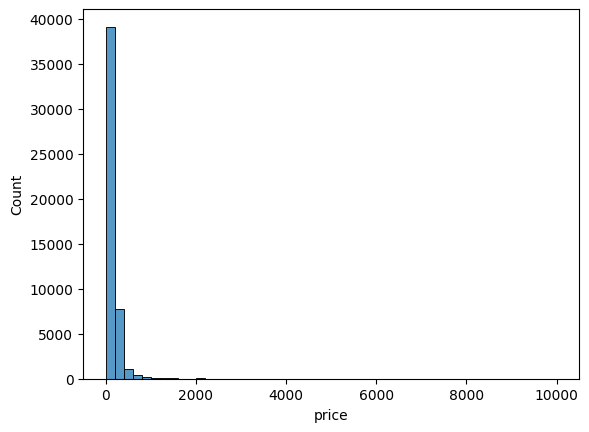

In [10]:
# investigate the distribution of the target variable
sns.histplot(df["price"], bins= 50)

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='price', ylabel='Count'>

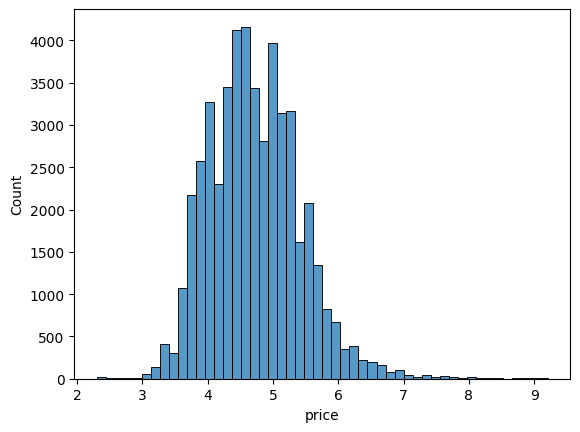

In [11]:
# visualizing the distribution of the log of apartment prices
sns.histplot(np.log(df["price"]), bins= 50)

In [12]:
features = df.columns[2:]

In [13]:
df = df[features]

In [14]:
df.select_dtypes(exclude = object).corr()

latitude  longitude     price  minimum_nights  \
latitude                        1.000000   0.084788  0.033939        0.024869   
longitude                       0.084788   1.000000 -0.150019       -0.062747   
price                           0.033939  -0.150019  1.000000        0.042799   
minimum_nights                  0.024869  -0.062747  0.042799        1.000000   
number_of_reviews              -0.015389   0.059094 -0.047954       -0.080116   
calculated_host_listings_count  0.019517  -0.114713  0.057472        0.127960   
availability_365               -0.010983   0.082731  0.081829        0.144303   

                                number_of_reviews  \
latitude                                -0.015389   
longitude                                0.059094   
price                                   -0.047954   
minimum_nights                          -0.080116   
number_of_reviews                        1.000000   
calculated_host_listings_count          -0.072376   
availability_365                         0.172028   

                                calculated_host_listings_count  \
latitude                                              0.019517   
longitude                                            -0.114713   
price                                                 0.057472   
minimum_nights                                        0.127960   
number_of_reviews                                    -0.072376   
calculated_host_listings_count                        1.000000   
availability_365                                      0.225701   

                                availability_365  
latitude                               -0.010983  
longitude                               0.082731  
price                                   0.081829  
minimum_nights                          0.144303  
number_of_reviews                       0.172028  
calculated_host_listings_count          0.225701  
availability_365                        1.000000

<Axes: >

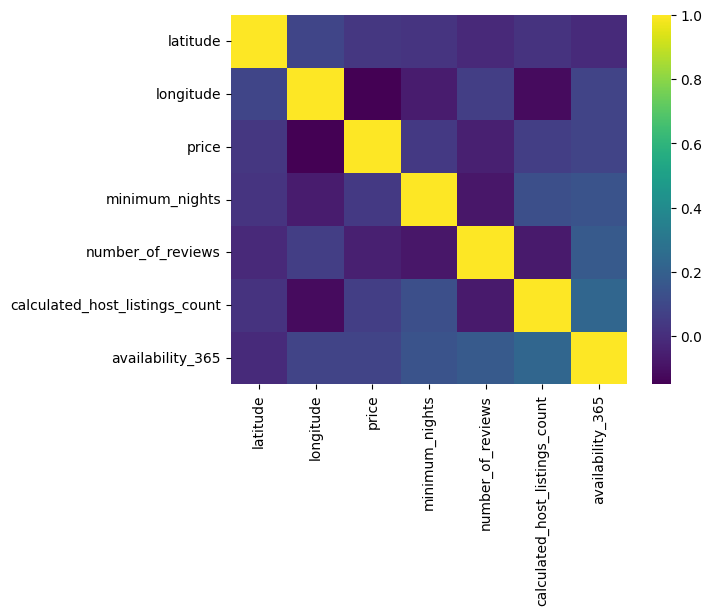

In [15]:
sns.heatmap(df.select_dtypes(exclude = object).corr(),cmap= "viridis")

In [16]:
df = df[df["price"]> 0]

In [17]:
df["log_price"] = np.log(df["price"])

In [18]:
df.head()

neighbourhood_group  latitude  longitude        room_type  price  \
0            Brooklyn  40.64749  -73.97237     Private room    149   
1           Manhattan  40.75362  -73.98377  Entire home/apt    225   
2           Manhattan  40.80902  -73.94190     Private room    150   
3            Brooklyn  40.68514  -73.95976  Entire home/apt     89   
4           Manhattan  40.79851  -73.94399  Entire home/apt     80   

   minimum_nights  number_of_reviews  calculated_host_listings_count  \
0               1                  9                               6   
1               1                 45                               2   
2               3                  0                               1   
3               1                270                               1   
4              10                  9                               1   

   availability_365  log_price  
0               365   5.003946  
1               355   5.416100  
2               365   5.010635  
3               194   4.488636  
4                 0   4.382027

In [19]:
df.drop(columns= "price", inplace= True)

In [20]:
df.select_dtypes(exclude = object).corr()

latitude  longitude  minimum_nights  \
latitude                        1.000000   0.084830        0.024893   
longitude                       0.084830   1.000000       -0.062772   
minimum_nights                  0.024893  -0.062772        1.000000   
number_of_reviews              -0.015357   0.059015       -0.080080   
calculated_host_listings_count  0.019518  -0.114715        0.127962   
availability_365               -0.010942   0.082669        0.144275   
log_price                       0.079430  -0.326143        0.033236   

                                number_of_reviews  \
latitude                                -0.015357   
longitude                                0.059015   
minimum_nights                          -0.080080   
number_of_reviews                        1.000000   
calculated_host_listings_count          -0.072385   
availability_365                         0.171975   
log_price                               -0.042319   

                                calculated_host_listings_count  \
latitude                                              0.019518   
longitude                                            -0.114715   
minimum_nights                                        0.127962   
number_of_reviews                                    -0.072385   
calculated_host_listings_count                        1.000000   
availability_365                                      0.225712   
log_price                                             0.132655   

                                availability_365  log_price  
latitude                               -0.010942   0.079430  
longitude                               0.082669  -0.326143  
minimum_nights                          0.144275   0.033236  
number_of_reviews                       0.171975  -0.042319  
calculated_host_listings_count          0.225712   0.132655  
availability_365                        1.000000   0.098844  
log_price                               0.098844   1.000000

In [21]:
target = "log_price"
feature = ["latitude", "longitude"]
X =  df[feature]
y = df[target]

In [22]:
X_train, X_test,y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state= 102)

In [23]:
pipe = make_pipeline(

    StandardScaler(),
    LinearRegression()
)

In [24]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [25]:
y_pred_train = pipe.predict(X_train)

In [26]:
MAE = mean_absolute_error(np.exp(y_train), np.exp(y_pred_train))
print(MAE)

78.98072551823155


In [27]:
#encoding the neighbourhood column
encoder = OneHotEncoder()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48884 entries, 0 to 48894
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48884 non-null  object 
 1   latitude                        48884 non-null  float64
 2   longitude                       48884 non-null  float64
 3   room_type                       48884 non-null  object 
 4   minimum_nights                  48884 non-null  int64  
 5   number_of_reviews               48884 non-null  int64  
 6   calculated_host_listings_count  48884 non-null  int64  
 7   availability_365                48884 non-null  int64  
 8   log_price                       48884 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 3.7+ MB


In [29]:
df.select_dtypes(object).nunique()

neighbourhood_group    5
room_type              3
dtype: int64

In [30]:
target = "log_price"
y = df[target]
X = df.drop(columns= target)

In [31]:
X.select_dtypes(exclude = object).columns

Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [32]:
preprocessor = ColumnTransformer(
    transformers= [
        ("cat", OneHotEncoder(sparse_output = False), ["neighbourhood_group", "room_type"]),
        ("num", StandardScaler(), X.select_dtypes(exclude = object).columns)
    ],
    remainder= "passthrough"
)

In [33]:
X_train, X_test,y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state= 102)

In [34]:
pipe = make_pipeline(
    preprocessor,
    LinearRegression()
)

In [35]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['neighbourhood_group',
                                                   'room_type']),
                                                 ('num', StandardScaler(),
                                                  Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object'))])),
                ('linearregression', LinearRegression())])

In [36]:
y_pred_train = pipe.predict(X_train)

In [37]:
MAE = mean_absolute_error(np.exp(y_train), np.exp(y_pred_train))
print(MAE)

62.90582648217432


In [38]:
X_test

neighbourhood_group  latitude  longitude        room_type  \
3584            Manhattan  40.81968  -73.95353     Private room   
14401           Manhattan  40.72224  -73.99192  Entire home/apt   
43406           Manhattan  40.75923  -73.98650  Entire home/apt   
42005            Brooklyn  40.65554  -73.94990     Private room   
15990           Manhattan  40.82272  -73.94502  Entire home/apt   
...                   ...       ...        ...              ...   
4318             Brooklyn  40.67335  -73.91881  Entire home/apt   
22990            Brooklyn  40.70904  -73.93980     Private room   
22923           Manhattan  40.77973  -73.95039  Entire home/apt   
47499            Brooklyn  40.68743  -73.95257  Entire home/apt   
9128            Manhattan  40.75440  -73.97345  Entire home/apt   

       minimum_nights  number_of_reviews  calculated_host_listings_count  \
3584                2                138                               1   
14401               1                  0                               1   
43406              29                  0                             327   
42005               3                  7                               1   
15990              31                 56                               2   
...               ...                ...                             ...   
4318                5                177                               1   
22990               3                 69                               2   
22923               2                 17                               1   
47499               5                  0                               1   
9128                2                 25                               1   

       availability_365  
3584                  7  
14401                 0  
43406               331  
42005                43  
15990               341  
...                 ...  
4318                214  
22990                56  
22923               338  
47499                22  
9128                  4  

[9777 rows x 8 columns]

In [39]:
y_pred_test = pipe.predict(X_test)

In [40]:
MAE = mean_absolute_error(np.exp(y_test), np.exp(y_pred_test))
print(MAE)

63.94092995046708


In [41]:
#using lasso regression
pipe = make_pipeline(
    preprocessor,
    Lasso()
)

In [42]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['neighbourhood_group',
                                                   'room_type']),
                                                 ('num', StandardScaler(),
                                                  Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object'))])),
                ('lasso', Lasso())])

In [43]:
y_pred_train = pipe.predict(X_train)

In [44]:
MAE = mean_absolute_error(np.exp(y_train), np.exp(y_pred_train))
print(MAE)

83.99608863813556


In [45]:
y_pred_test = pipe.predict(X_test)

In [46]:
MAE = mean_absolute_error(np.exp(y_test), np.exp(y_pred_test))
print(MAE)

85.24288726936786
